## Name and ID

**TODO**

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list
mlp_lbfgs_list = list()
zero_list = list()
nonzero_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.4f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    
    if mlp_lbfgs.loss_ <= 0.001:
        zero_list.append(elapsed_time_sec)
    else:
        nonzero_list.append(elapsed_time_sec)

    mlp_lbfgs_list.append(mlp_lbfgs)

print('\nNonzero loss average run time: %4f \nZero loss average run time:    %4f' % (np.mean(nonzero_list), np.mean(zero_list)))

finished LBFGS run  1/16 after 0.0440 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after 0.0330 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after 0.0140 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.0230 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after 0.0280 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after 0.0180 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.0150 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.0230 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  9/16 after 0.0340 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.0280 sec |   0 iters | converged    | loss 0.000
finished LBFGS run 11/16 after 0.0470 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.0410 sec |   0 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

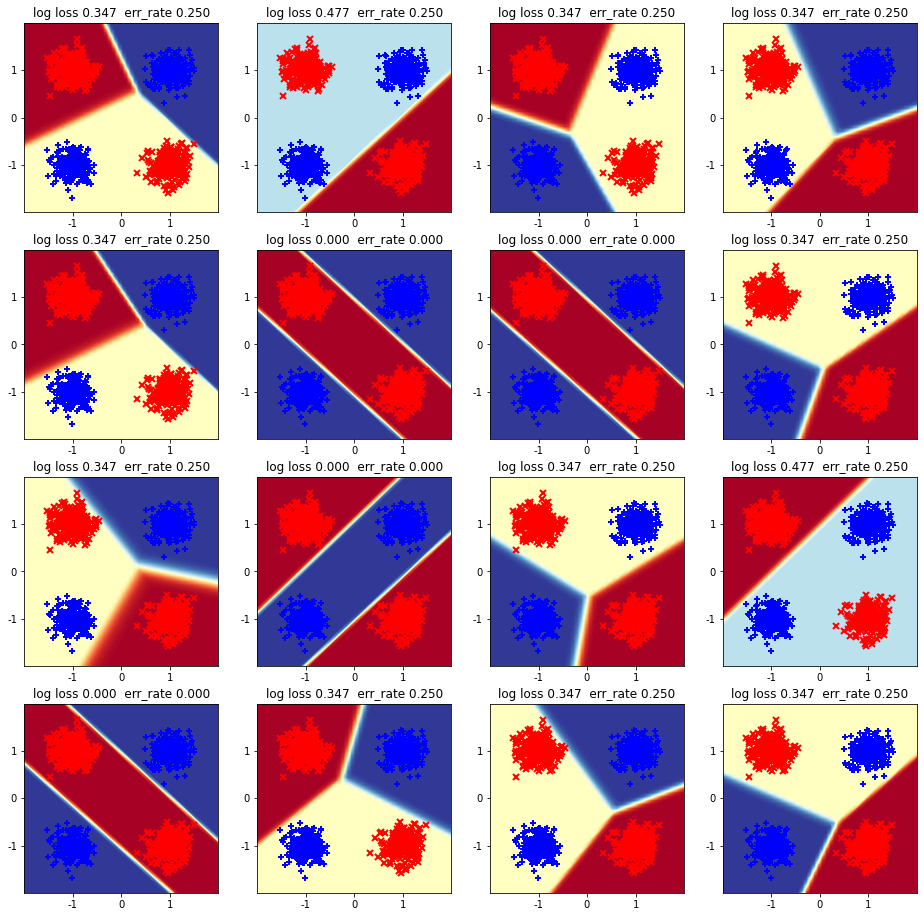

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_lbfgs_list)):
    plot_pretty_probabilities_for_clf(mlp_lbfgs_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i // 4, i % 4])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
4 of 14 of the runs reach 0 training error. While all models converge at a minimum (menaing that the change in loss between iterations is less than the tolderance 1e-4), there are only 4 models that converge to the global minimum -- all 12 other models converge to a local minimum and can't perfectly classify all data. For models that have 'zero' loss, the average runtime is 0.019738, while other models have an average runtime of 0.029316 -- about 50% worse. This is because once the model's loss reaches a certain very low value (in this case, all 'zero'-loss models have loss < 0.001), the model is done fitting, so the loops of weight adjustments ends; for other models, the weights stop changing by a substantial amount -- because they reached a local minimum -- so the model stops trying to adjust.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list
mlp_lbfgs_list = list()
zero_list = list()
nonzero_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.4f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    
    if mlp_lbfgs.loss_ <= 0.001:
        zero_list.append(elapsed_time_sec)
    else:
        nonzero_list.append(elapsed_time_sec)

    mlp_lbfgs_list.append(mlp_lbfgs)

print('\nNonzero loss average run time: %4f \nZero loss average run time:    %4f' % (np.mean(nonzero_list), np.mean(zero_list)))

finished LBFGS run  1/16 after 0.0490 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  2/16 after 0.0959 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  3/16 after 0.0370 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  4/16 after 0.0650 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  5/16 after 0.0260 sec |   0 iters | converged    | loss 0.477
finished LBFGS run  6/16 after 0.0280 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  7/16 after 0.0450 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  8/16 after 0.0570 sec |   0 iters | converged    | loss 0.477
finished LBFGS run  9/16 after 0.0470 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 10/16 after 0.0840 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 11/16 after 0.0640 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 12/16 after 0.0830 sec |   0 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

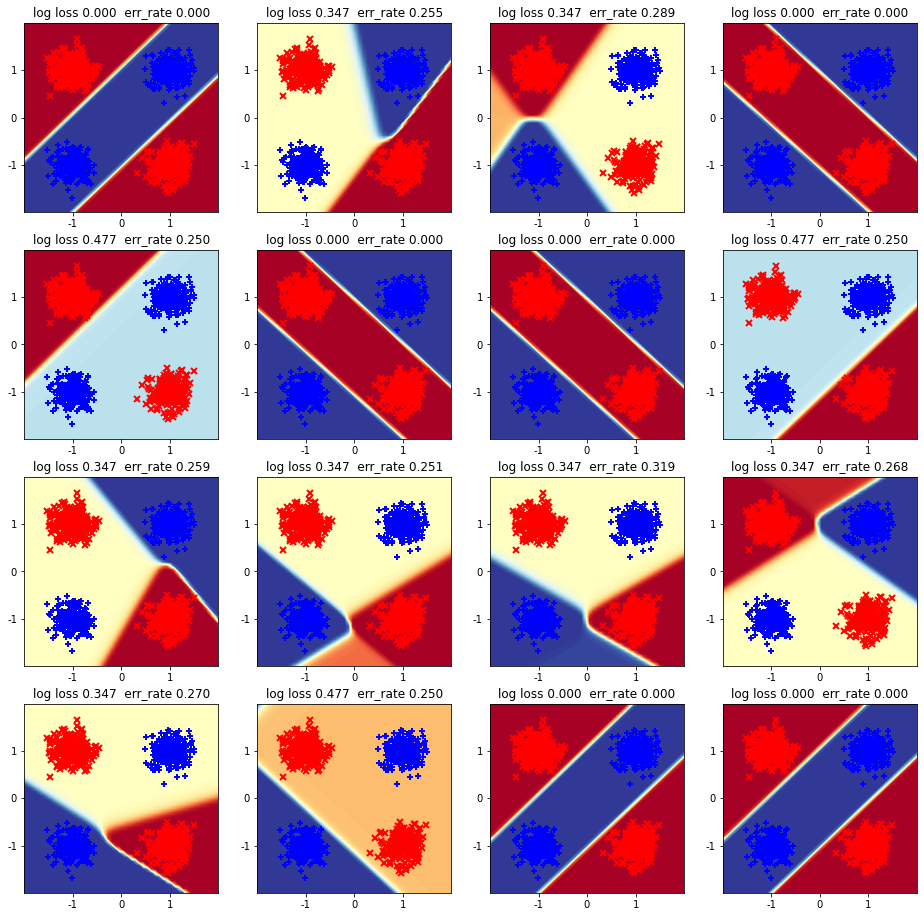

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_lbfgs_list)):
    plot_pretty_probabilities_for_clf(mlp_lbfgs_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i // 4, i % 4])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
With the logistic activation function, we see 6 of the 16 models reach zero training error. The other models also converge, but not at the global minumum, which is why they still have error despite the data being fully non-linearly separable. The runtimes between the zero and non-zero models are 0.043808 vs 0.063963, both of which are much worse than the sub-0.03s of the ReLU. This is likely because the logisitc function and its gradient are more computationally expensive to calculate, so the errors and weight adjustments take longer to occur. Another differen

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [14]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

mlp_sgd_list = list()
conv_list = list()
nonconv_list = list()

n_runs = 16
for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )

    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

    if mlp_sgd.did_converge == True:
        conv_list.append(elapsed_time_sec)
    else:
        nonconv_list.append(elapsed_time_sec)

    mlp_sgd_list.append(mlp_sgd)

print('\nConverging loss average run time: %4f \nNonconverging loss average run time:    %4f' % (np.mean(conv_list), np.mean(nonconv_list)))


finished SGD run  1/16 after    7.6 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    9.0 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    6.9 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   10.9 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    7.4 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   10.9 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   11.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    7.7 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    6.0 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   11.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   11.0 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   11.2 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

In [15]:
print(np.mean(conv_list))
print(np.mean(nonconv_list))

8.088450246387058
11.043207372937884


#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

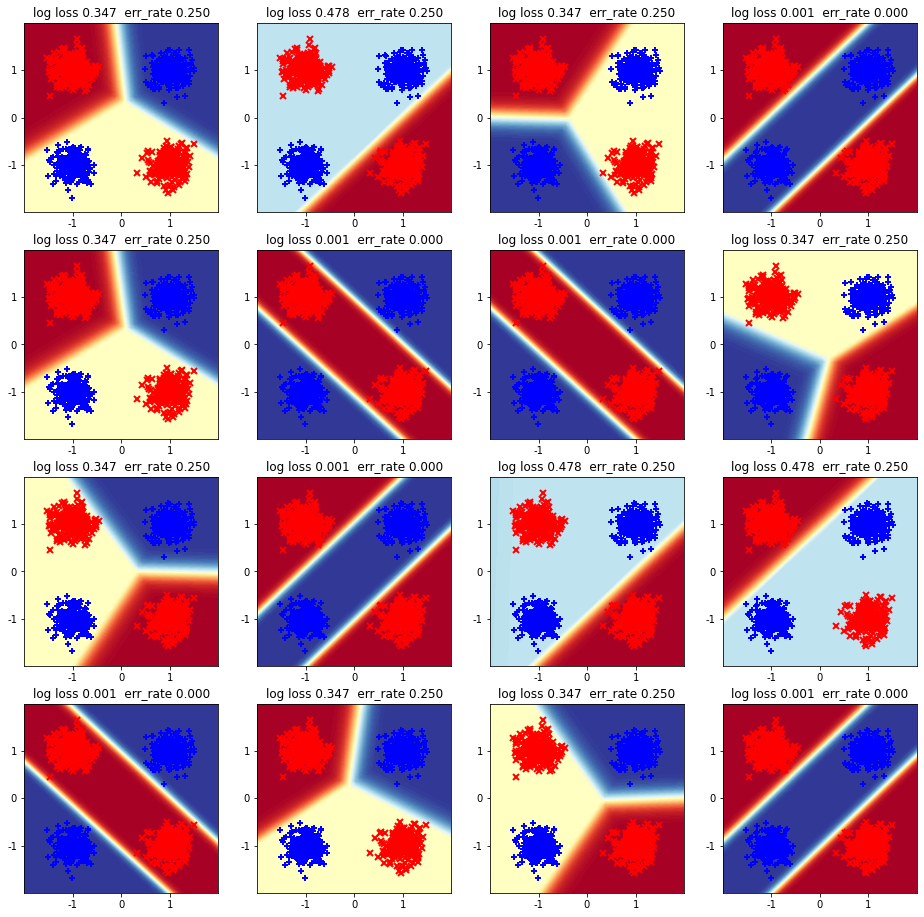

In [8]:
# TODO edit to plot all 16 runs from above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(len(mlp_sgd_list)):
    plot_pretty_probabilities_for_clf(mlp_sgd_list[i], x_tr_N2, y_tr_N, ax=ax_grid[i//4, i%4])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:
6 out of 16 models essentially get to zero (less than 0.01) loss. The others show patterns similar to those in the L-BFGS ReLU models. It's interesting that it's not necessarily the case that a model has to converge to get zero error, which intuitively I would have assumed. I read that SGD is often more jumpy than BFGS because it doesnt use the second derivative -- it would make sense that models struggle to converge because the weight adjustment is never super small, so they have to go through all 400 epochs. The models that did converge -- which are not necessarily the models with zero loss -- has a faster runtime by about 3 seconds, but these are also the models that get stuck in local minima. When the model doesn't have to go through 100+ epochs, it spares a lot of calculations and can be fit significantly faster. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**:
Based on my limited understanding of BFGS, I would guess that because BFGS uses the first and second derivative, it understands the behavior of the loss curve better, and adjusts the weights more accurately. SGD only uses teh first derivative, so it might be more jumpy. I decided to look at the changes made to the first weight for each type of model, and this guess looks to be true -- SGD shifts around a lot more.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

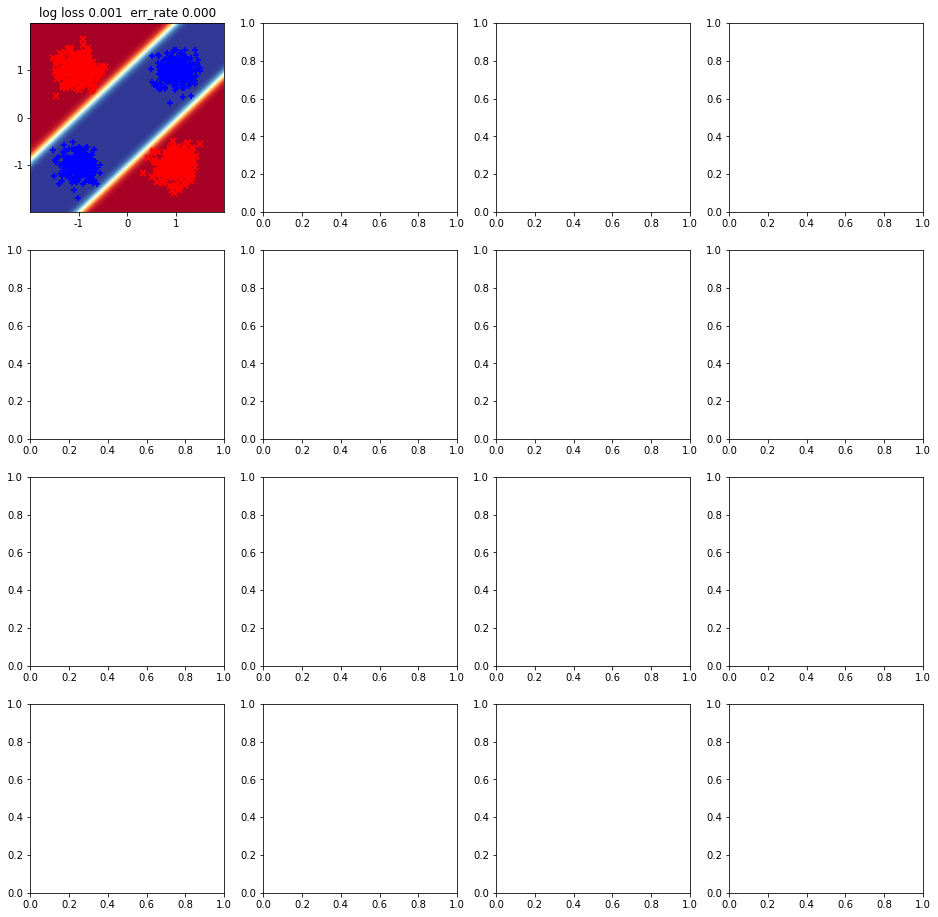

In [10]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: TODO

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: TODO

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

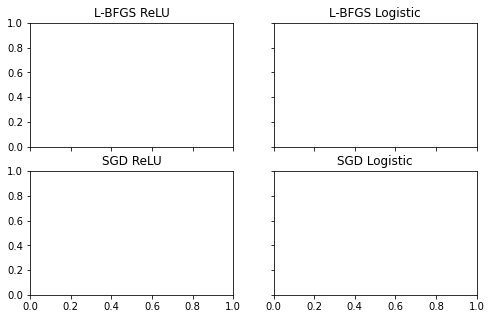

In [11]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** TODO

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: TODO